In [1]:
import pandas as pd
import ast

In [2]:
dataset_name = ['ADHD', 'Blind', 'Disability']
df_list = []
for d in dataset_name:
    df_list.append(pd.read_csv(f'datasets/2nd_filtering/{d}_sorted_set.csv', index_col=0))


In [3]:
for i, d in enumerate(dataset_name):
    df = df_list[i]
    df['token_count'] = df['anonymized_body_lemmatized'].apply(lambda x: len(ast.literal_eval(x)))
    df['token_type_count'] = df['anonymized_body_lemmatized'].apply(lambda x: len(set(ast.literal_eval(x))))
    print(f'=====dataset:{d}======')
    print(f"Posts:{df.shape[0]}")
    print(f"Tokens:{df['token_count'].sum()}")
    print(f"Types:{df['token_type_count'].sum()}")
    print(f"TTR:{(df['token_type_count'].sum()/df['token_count'].sum()*1000).round(2)}")
    print(f"Avg. of tokens:{df['token_count'].mean().round(2)}")
    print(f"Avg. of types:{df['token_type_count'].mean().round(2)}")
    sentiment = df['post_sentiment_label'].apply(lambda x: 1 if x == 'negative' else 0)
    print(f"Sentiment ratio:{(sentiment.value_counts()[1]/sentiment.value_counts()[0]).round(2)}")
    print(f"Relevance ratio:{(df['Relevance'].value_counts()[1]/df['Relevance'].value_counts()[0]).round(2)}")

=====dataset:ADHD======
Posts:56197
Tokens:10812473
Types:5613877
TTR:519.2
Avg. of tokens:192.4
Avg. of types:99.9
Sentiment ratio:1.06
Relevance ratio:13.64
=====dataset:Blind======
Posts:1008
Tokens:214930
Types:108452
TTR:504.59
Avg. of tokens:213.22
Avg. of types:107.59
Sentiment ratio:0.74
Relevance ratio:10.33
=====dataset:Disability======
Posts:2434
Tokens:527366
Types:264690
TTR:501.91
Avg. of tokens:216.67
Avg. of types:108.75
Sentiment ratio:1.51
Relevance ratio:14.6


In [4]:
predictions = pd.read_csv('all_predictions.csv', index_col =0)
scores = pd.read_csv('all_scores.csv', index_col =0)


In [5]:
summary = []
for m in scores['model'].unique():
    score = scores[(scores['dataset'] == 'Disability') & (scores['model'] == m)]
    summary.append({'model': m, 'acc': score['acc'].mean(), 'prec': score['prec'].mean(), 'rec': score['rec'].mean(), 'f1-score': score['f1-score'].mean()})
pd.DataFrame(summary)

,model,acc,prec,rec,f1-score
0,llama2_7b_pred,0.585,0.547472,1.00,0.707261
1,llama2_13b_pred,0.850,0.888889,0.80,0.842105
2,TimeLMs_label,0.500,0.500000,1.00,0.666667
3,hatexplain_label,0.500,0.500000,1.00,0.666667
4,llama2_7b_FL_pred,0.730,0.652871,0.99,0.786254
5,llama2_13b_FL_pred,0.665,1.000000,0.33,0.494505


In [6]:
#time plotting
dataset_name = ['ADHD', 'Blind', 'Disability']
df_list

[                             commentator_id  created_utc  \
 1      b7ca8fc9-60ab-42eb-9e00-fd05cb7f5df2   1514158843   
 2      c1ef4074-aa8e-4a9c-9737-65a5dc744f80   1495918070   
 4      9228c6e7-ade8-4999-afa5-b9b6b18ec917   1556787734   
 8      c94e8ad0-f2de-4054-9175-c645ebc409ac   1560179479   
 9      c94e8ad0-f2de-4054-9175-c645ebc409ac   1560179479   
 ...                                     ...          ...   
 56127  930bda5d-9b55-4a69-93a6-7cb7e4b40f71   1498715750   
 56130  d88feaeb-99b0-46de-bfc5-42017c82854c   1571812437   
 56174  0f9bbdfe-6a6a-41f9-968d-280de9aa9d50   1563357887   
 56180  7a726ce6-4f9d-44ef-b7de-e25901dea15b   1480715479   
 56193  2e7fdb97-5520-4dca-ba31-55e3d1bd8672   1498367229   
 
                                          anonymized_body  ups  downs  score  \
 1      this year has been the worst yet. i stayed hom...  NaN    NaN      3   
 2      So many shitty psychiatrists out there it's ma...  NaN    NaN     11   
 4      I straight up don'

In [7]:
#Task 1, voting, downvoting, socre ploting for three discourse
#time plotting
dataset_name = ['ADHD', 'Blind', 'Disability']
#Task 1, voting, downvoting, socre ploting for three discourse
task_plot_df = pd.DataFrame()
for i in [0,1,2]:
    df = df_list[i].copy()
    df['dataset'] = dataset_name[i]
    task_plot_df = pd.concat([task_plot_df,df[['created_utc','ups','downs','score','dataset']]], axis=0)
task_plot_df = task_plot_df.reset_index(drop=False)
task_plot_df.fillna(0, inplace=True)
task_plot_df

,index,created_utc,ups,downs,score,dataset
0,1,1514158843,0.0,0.0,3,ADHD
1,2,1495918070,0.0,0.0,11,ADHD
2,4,1556787734,0.0,0.0,1,ADHD
3,8,1560179479,0.0,0.0,1,ADHD
4,9,1560179479,0.0,0.0,1,ADHD
...,...,...,...,...,...,...
59634,2419,1480903409,0.0,0.0,2,Disability
59635,2421,1471905990,1.0,0.0,1,Disability
59636,2423,1509899508,0.0,0.0,2,Disability
59637,2425,1468467056,1.0,0.0,1,Disability


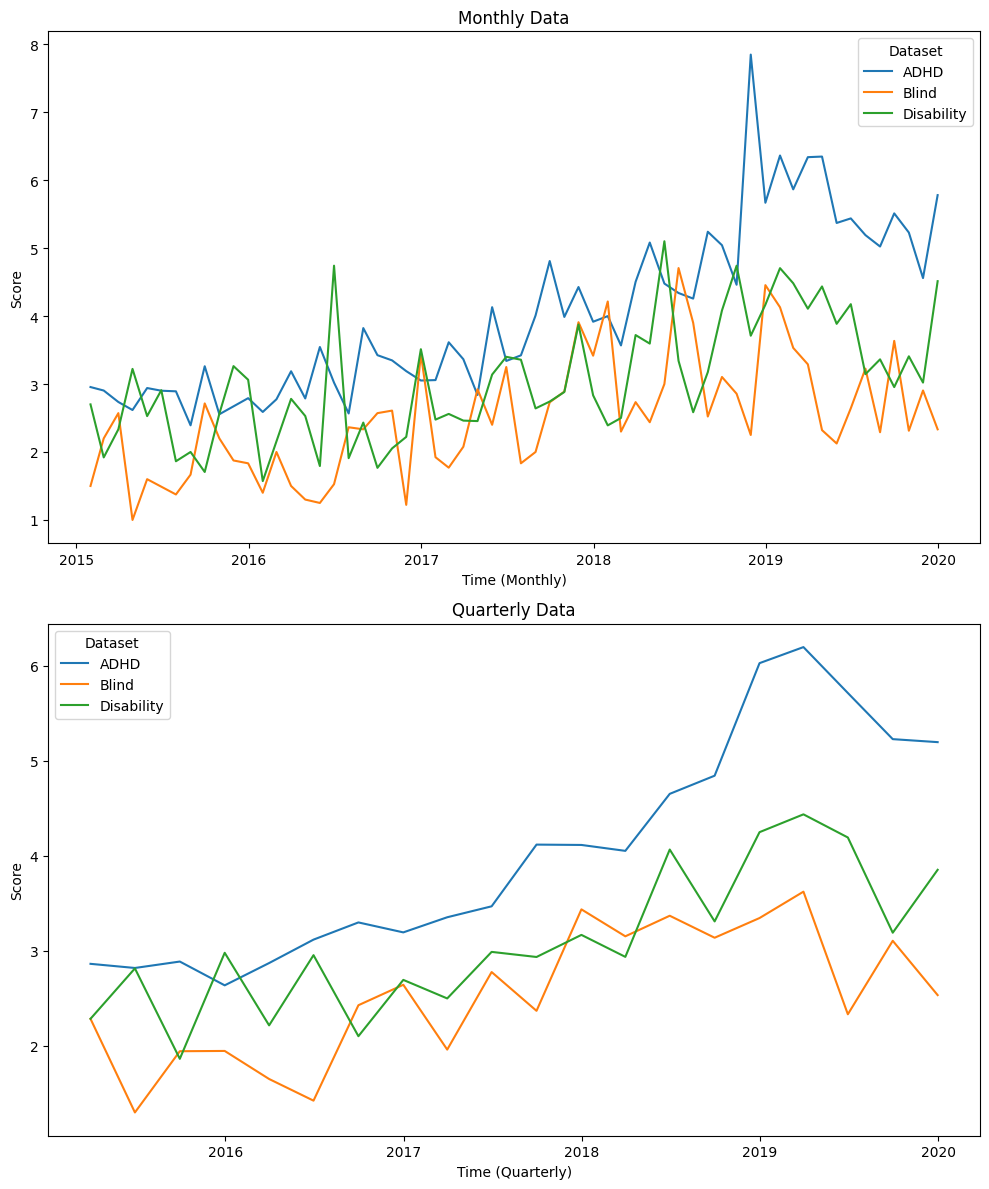

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
df = task_plot_df.copy()

# Convert 'created_utc' to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Set 'created_utc' as index
df.set_index('created_utc', inplace=True)

# Group by 'dataset', resample monthly, and aggregate using mean
monthly_data = df.groupby('dataset').resample('M').mean()
quarterly_data = df.groupby(['dataset', pd.Grouper(freq='Q')]).mean().reset_index()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot monthly data
sns.lineplot(data=monthly_data, x='created_utc', y='score', hue='dataset', ax=axes[0])
axes[0].set_title('Monthly Data')
axes[0].set_xlabel('Time (Monthly)')
axes[0].set_ylabel('Score')
axes[0].legend(title='Dataset')


# Plot quarterly data
sns.lineplot(data=quarterly_data, x='created_utc', y='score', hue='dataset', ax=axes[1])
axes[1].set_title('Quarterly Data')
axes[1].set_xlabel('Time (Quarterly)')
axes[1].set_ylabel('Score')
axes[1].legend(title='Dataset')

plt.tight_layout()
plt.show()

In [27]:
#Task 2, Ploting based on the term frequency
#time plotting
import ast
dataset_name = ['ADHD', 'Blind', 'Disability']
task_plot_df = pd.DataFrame()
for i in [0,1,2]:
    df = df_list[i].copy()
    df['dataset'] = dataset_name[i]
    task_plot_df = pd.concat([task_plot_df,df[['anonymized_body_lemmatized','created_utc','ups','downs','score','dataset','keyword']]], axis=0)
task_plot_df = task_plot_df.reset_index(drop=False)
task_plot_df.fillna(0, inplace=True)
task_plot_df['anonymized_body_lemmatized'] = task_plot_df['anonymized_body_lemmatized'].apply(ast.literal_eval)
task_plot_df

,index,anonymized_body_lemmatized,created_utc,ups,downs,score,dataset,keyword
0,1,"[this, year, have, be, the, bad, yet, ., i, st...",1514158843,0.0,0.0,3,ADHD,dumb
1,2,"[So, many, shitty, psychiatrist, out, there, i...",1495918070,0.0,0.0,11,ADHD,moron
2,4,"[I, straight, up, do, n't, want, to, exist, an...",1556787734,0.0,0.0,1,ADHD,dumb
3,8,"[I, wish, I, could, kill, those, fucker, ., I,...",1560179479,0.0,0.0,1,ADHD,cripple
4,9,"[I, wish, I, could, kill, those, fucker, ., I,...",1560179479,0.0,0.0,1,ADHD,attack
...,...,...,...,...,...,...,...,...
59634,2419,"[Hi, ,, I, be, a, CIE, Specialist, in, Pennsyl...",1480903409,0.0,0.0,2,Disability,slow
59635,2421,"[that, 's, cool, ,, you, have, nothing, to, lo...",1471905990,1.0,0.0,1,Disability,slow
59636,2423,"[Thanks, for, reply, ., The, tag, point, be, p...",1509899508,0.0,0.0,2,Disability,crazy
59637,2425,"[oh, yeah, ,, have, friend, in, Portland, who,...",1468467056,1.0,0.0,1,Disability,crazy


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of lemmatized words into strings
keyword_set = list(task_plot_df['keyword'])
corpus = task_plot_df['anonymized_body_lemmatized'].apply(lambda x: ' '.join(x))

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=set(task_plot_df['keyword']))

# Fit the vectorizer on the corpus and transform the corpus into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the TF-IDF frequency for each word
word_tfidf = dict(zip(feature_names, tfidf_vectors.sum(axis=0).A1))

# Find the top-n words based on TF-IDF frequency
top_n = 5  # Define the number of top words you want to find
top_words_tfidf = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Print the top-n words based on TF-IDF frequency
print("Top", top_n, "words based on TF-IDF frequency:")
for word, tfidf in top_words_tfidf:
    print(word, "-", tfidf)
selected_words = [word for word, _ in top_words_tfidf]

# Convert the list of lemmatized words into strings
corpus = task_plot_df['anonymized_body_lemmatized'].apply(lambda x: ' '.join(x))

# Create a TF-IDF vectorizer with the selected word set
tfidf_vectorizer = TfidfVectorizer(vocabulary=selected_words)

# Fit the vectorizer on the corpus and transform the corpus into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add index and other columns to the DataFrame
tfidf_df['index'] = task_plot_df['index']
tfidf_df['created_utc'] = task_plot_df['created_utc']
tfidf_df['ups'] = task_plot_df['ups']
tfidf_df['downs'] = task_plot_df['downs']
tfidf_df['score'] = task_plot_df['score']
tfidf_df['dataset'] = task_plot_df['dataset']
tfidf_df['keyword'] = task_plot_df['keyword']

# Reorder columns
tfidf_df = pd.DataFrame(tfidf_df[['index', 'created_utc', 'ups', 'downs', 'score', 'dataset', 'keyword'] + selected_words])

Top 5 words based on TF-IDF frequency:
slow - 16587.307328136943
crazy - 15691.559095593737
attack - 8327.91246624116
dumb - 6882.372668007194
insane - 4399.442797551217


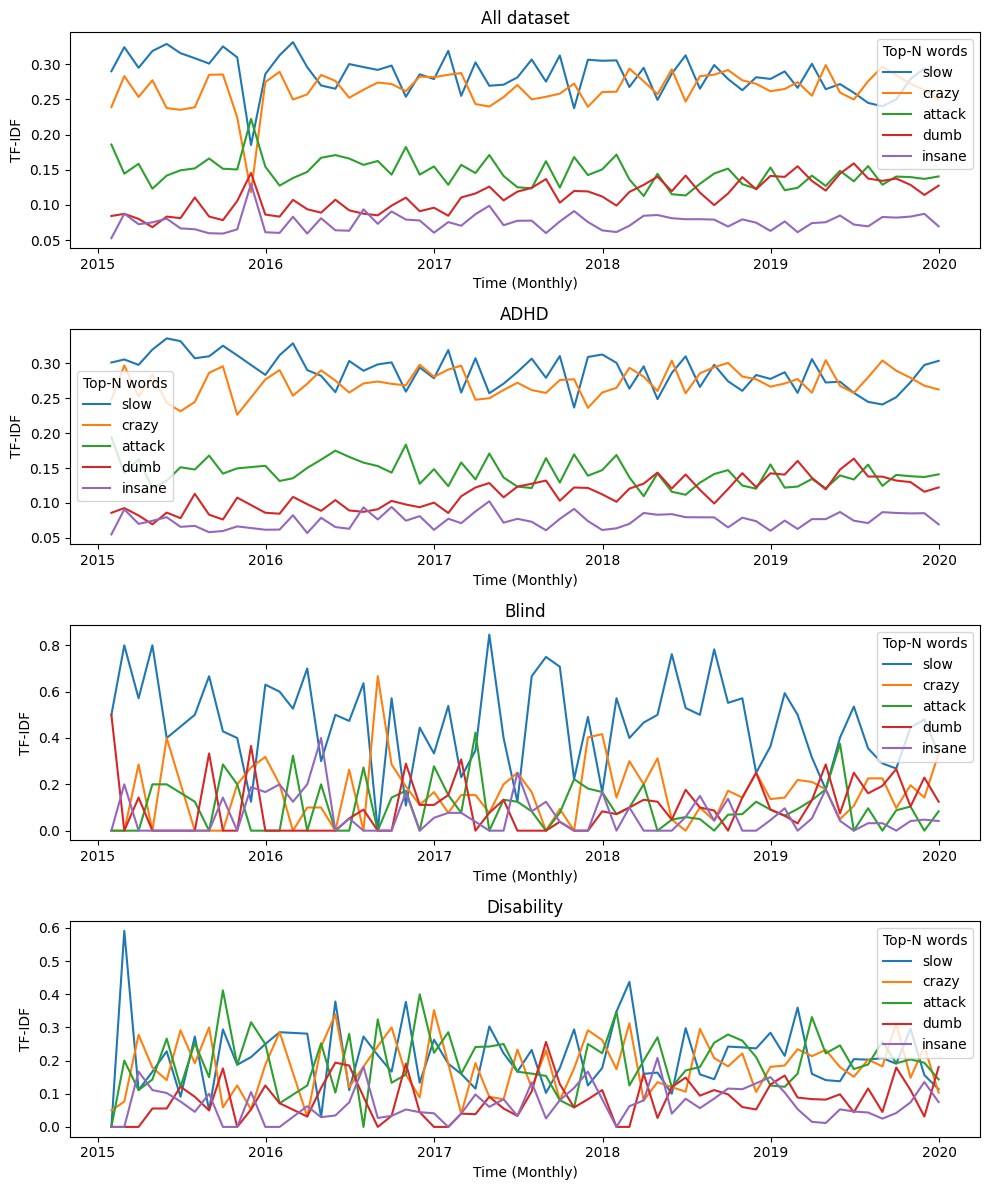

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
df = tfidf_df.copy()

# Convert 'created_utc' to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Set 'created_utc' as index
df.set_index('created_utc', inplace=True)
df.drop('keyword', axis=1, inplace=True)

monthly_data = df.groupby('dataset').resample('M').mean()
df.drop('dataset', axis=1, inplace=True)
monthly_data_global = df.resample('M').mean()
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# Plot monthly data
for i in selected_words:
    sns.lineplot(data=monthly_data_global, x='created_utc', y=i, ax=axes[0], label=i)
axes[0].set_title('All dataset')
axes[0].set_xlabel('Time (Monthly)')
axes[0].set_ylabel('TF-IDF')
axes[0].legend(title='Top-N words')

# Plot monthly data
for i in selected_words:
    sns.lineplot(data=monthly_data.loc['ADHD'], x='created_utc', y=i, ax=axes[1], label=i)
axes[1].set_title('ADHD')
axes[1].set_xlabel('Time (Monthly)')
axes[1].set_ylabel('TF-IDF')
axes[1].legend(title='Top-N words')

# Plot monthly data
for i in selected_words:
    sns.lineplot(data=monthly_data.loc['Blind'], x='created_utc', y=i, ax=axes[2], label=i)
axes[2].set_title('Blind')
axes[2].set_xlabel('Time (Monthly)')
axes[2].set_ylabel('TF-IDF')
axes[2].legend(title='Top-N words')

# Plot monthly data
for i in selected_words:
    sns.lineplot(data=monthly_data.loc['Disability'], x='created_utc', y=i, ax=axes[3], label=i)
axes[3].set_title('Disability')
axes[3].set_xlabel('Time (Monthly)')
axes[3].set_ylabel('TF-IDF')
axes[3].legend(title='Top-N words')


plt.tight_layout()
plt.show()

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
df = tfidf_df.copy()

# Convert 'created_utc' to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Set 'created_utc' as index
df.set_index('created_utc', inplace=True)
df.drop('keyword', axis=1, inplace=True)
monthly_data = df.groupby('dataset').resample('M').mean()

In [85]:
df

,index,ups,downs,score,dataset,slow,crazy,attack,dumb,insane
created_utc,,,,,,,,,,
2017-12-24 23:40:43,1,0.0,0.0,3,ADHD,0.0,0.0,0.0,1.0,0.0
2017-05-27 20:47:50,2,0.0,0.0,11,ADHD,0.0,0.0,0.0,0.0,0.0
2019-05-02 09:02:14,4,0.0,0.0,1,ADHD,0.0,0.0,0.0,1.0,0.0
2019-06-10 15:11:19,8,0.0,0.0,1,ADHD,0.0,0.0,1.0,0.0,0.0
2019-06-10 15:11:19,9,0.0,0.0,1,ADHD,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-05 02:03:29,2419,0.0,0.0,2,Disability,1.0,0.0,0.0,0.0,0.0
2016-08-22 22:46:30,2421,1.0,0.0,1,Disability,1.0,0.0,0.0,0.0,0.0
2017-11-05 16:31:48,2423,0.0,0.0,2,Disability,0.0,1.0,0.0,0.0,0.0
